In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dt
import pickle

import sklearn.preprocessing as pp
from mpl_toolkits.mplot3d import Axes3D

import scipy.linalg as la


#### Pré-Processamento de dados

##### StandardScaler
- Tira a média dos dados e coloca a variância de cada dimensão igual a 1. Cada dimensão dos dados irá variar da mesma maneira que as restantes dimensões. 
- Importante no caso de situações em que algumas dimensões variam bastante em relação a outras dimensões. 
- Necessário primeiro treinar o StandardScaler e depois fazemos a transformação dos dados. 
- Método não supervisionados. 

[0 1 2]

Média de cada dimensão: 
 [5.84333333 3.05733333 3.758      1.19933333]

Desvio padrão de cada uma das dimensões: 
 [0.82530129 0.43441097 1.75940407 0.75969263]


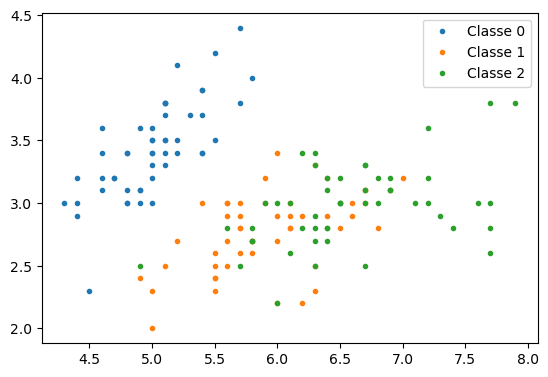

In [2]:
D = dt.load_iris()
X = D['data'].T
y = D['target']
print(np.unique(y))
plt.plot(X[0,y==0], X[1, y==0], '.')
plt.plot(X[0,y==1], X[1, y==1], '.')
plt.plot(X[0,y==2], X[1, y==2], '.')
plt.legend(['Classe 0', 'Classe 1', 'Classe 2'])
plt.axis('scaled')

print("\nMédia de cada dimensão: \n", np.mean(X.T, axis=0))
print("\nDesvio padrão de cada uma das dimensões: \n", np.std(X.T, axis=0) )


Média de cada dimensão: 
 [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]

Desvio padrão de cada uma das dimensões: 
 [1. 1. 1. 1.]

NOTA: Média igual a 0 e desvio padrão igual a 1. Centrou os dados em (0,0).


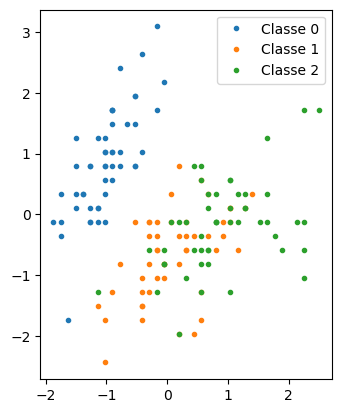

In [3]:
sc = pp.StandardScaler().fit(X.T)
Xs = sc.transform(X.T).T

plt.plot(Xs[0,y==0], Xs[1, y==0], '.')
plt.plot(Xs[0,y==1], Xs[1, y==1], '.')
plt.plot(Xs[0,y==2], Xs[1, y==2], '.')
plt.legend(['Classe 0', 'Classe 1', 'Classe 2'])
plt.axis('scaled')

print("\nMédia de cada dimensão: \n", np.mean(Xs.T, axis=0))
print("\nDesvio padrão de cada uma das dimensões: \n", np.std(Xs.T, axis=0) )

print("\nNOTA: Média igual a 0 e desvio padrão igual a 1. Centrou os dados em (0,0).")

##### RobustScaler
- Tira a mediana dos dados e o orimeiro e último quartil dos dados, em vez da média e da variância. 
- Poe os dados num quadrado ou num cubo, confinados num intervalo de [0, 1].


Média de cada dimensão: 
 [ 0.03333333  0.11466667 -0.16914286 -0.06711111]

Desvio padrão de cada uma das dimensões: 
 [0.63484715 0.86882194 0.50268688 0.50646175]

NOTA: Média igual a 0 e desvio padrão igual a 1. Centrou os dados em (0,0).


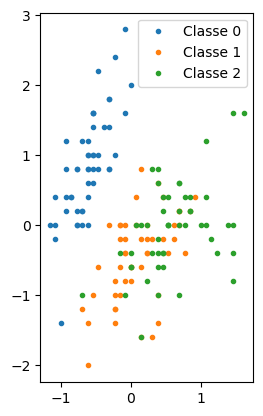

In [4]:
rs = pp.RobustScaler().fit(X.T)
Xn = rs.transform(X.T).T

plt.plot(Xn[0,y==0], Xn[1, y==0], '.')
plt.plot(Xn[0,y==1], Xn[1, y==1], '.')
plt.plot(Xn[0,y==2], Xn[1, y==2], '.')
plt.legend(['Classe 0', 'Classe 1', 'Classe 2'])
plt.axis('scaled')

print("\nMédia de cada dimensão: \n", np.mean(Xn.T, axis=0))
print("\nDesvio padrão de cada uma das dimensões: \n", np.std(Xn.T, axis=0) )

print("\nNOTA: Média igual a 0 e desvio padrão igual a 1. Centrou os dados em (0,0).")

##### MinMaxScaler
- Ver slides para extraír alguma informação. Não está dado nos vídeos. 


Média de cada dimensão: 
 [0.4287037  0.44055556 0.46745763 0.45805556]

Desvio padrão de cada uma das dimensões: 
 [0.22925036 0.18100457 0.29820408 0.31653859]

NOTA: Coloca os dados num quadrado.


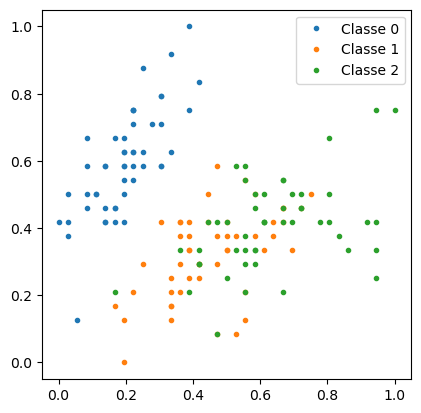

In [5]:
mm = pp.MinMaxScaler().fit(X.T)
Xm = mm.transform(X.T).T

plt.plot(Xm[0,y==0], Xm[1, y==0], '.')
plt.plot(Xm[0,y==1], Xm[1, y==1], '.')
plt.plot(Xm[0,y==2], Xm[1, y==2], '.')
plt.legend(['Classe 0', 'Classe 1', 'Classe 2'])
plt.axis('scaled')

print("\nMédia de cada dimensão: \n", np.mean(Xm.T, axis=0))
print("\nDesvio padrão de cada uma das dimensões: \n", np.std(Xm.T, axis=0) )

print("\nNOTA: Coloca os dados num quadrado.")

##### Normalizer
- Aplicada a dados esparço de alta dimensão ou dados de texto; 
- 1º passo para aplicar a distância com métrica de cosseno. 

- Se antes de aplicar o Normalizer, pré-processar os dados com os seguintes métodos, os resultados são os apresentados abaixo (assumindo apenas 2 dimensões dos dados): 
    * StandardScaler: Dados distribuídos num circulo; 
    * RobustScaler: Dados distribuídos num circulo; 
    * MinMax: Dados distribuídos apenas num quadrante do circulo. 
 - Com 3 dimensões, em vez de um circulo os dados são distribuídos numa esfera. 


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(150,)

Média de cada dimensão: 
 [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]

Desvio padrão de cada uma das dimensões: 
 [1. 1. 1. 1.]

NOTA: Coloca os dados num quadrado.


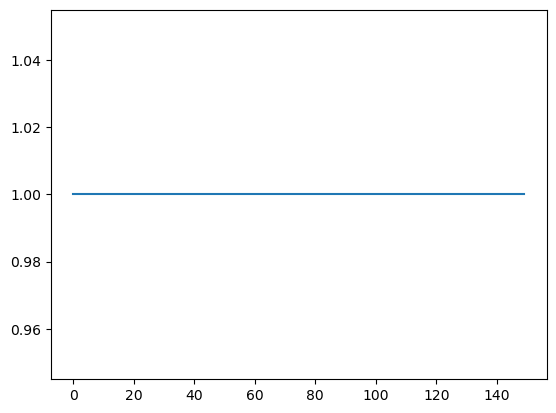

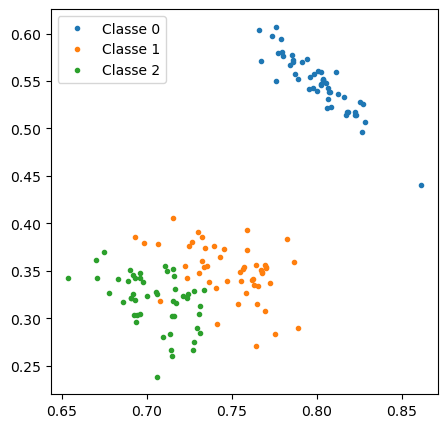

In [6]:
nn = pp.Normalizer().fit(X.T)
Xn = nn.transform(X.T).T
nX = np.sqrt(np.sum(Xn**2, axis=0))
print(nX[:10])
print(nX.shape)
plt.plot(nX)

plt.figure(figsize=(5,5))
plt.plot(Xn[0,y==0], Xn[1, y==0], '.')
plt.plot(Xn[0,y==1], Xn[1, y==1], '.')
plt.plot(Xn[0,y==2], Xn[1, y==2], '.')
plt.legend(['Classe 0', 'Classe 1', 'Classe 2'])

print("\nMédia de cada dimensão: \n", np.mean(Xs.T, axis=0))
print("\nDesvio padrão de cada uma das dimensões: \n", np.std(Xs.T, axis=0) )

print("\nNOTA: Coloca os dados num quadrado.")

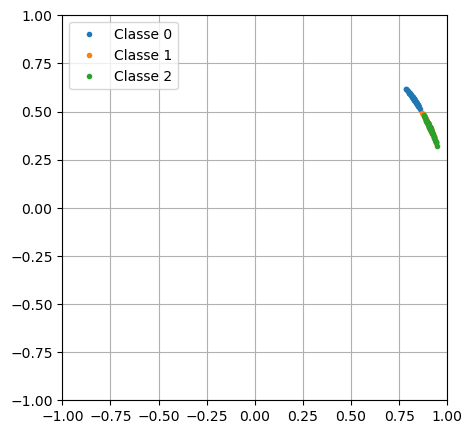

In [7]:
X2 = X[:2, :]

# Se descomentar estas linhas, ou seja, fizer o StardardScaler antes do Normalize, 
# os dados ficam distribuídos num circulo e não apenas numa parte do circulo.  
#sc = pp.StandardScaler().fit(X2.T)
#X2 = sc.transform(X2.T).T


# Se descomentar estas linhas, ou seja, fizer o MinMaxScaler antes do Normalize, 
# os dados ficam distribuídos num quarto do circulo e não apenas numa parte do circulo.  
#mm = pp.MinMaxScaler().fit(X2.T)
#X2 = mm.transform(X2.T).T


nn = pp.Normalizer().fit(X2.T)
Xn = nn.transform(X2.T).T

plt.figure(figsize=(5,5))
plt.plot(Xn[0,y==0], Xn[1, y==0], '.')
plt.plot(Xn[0,y==1], Xn[1, y==1], '.')
plt.plot(Xn[0,y==2], Xn[1, y==2], '.')
plt.legend(['Classe 0', 'Classe 1', 'Classe 2'])
plt.axis('scaled')
plt.axis([-1, 1, -1, 1])
plt.grid(True)



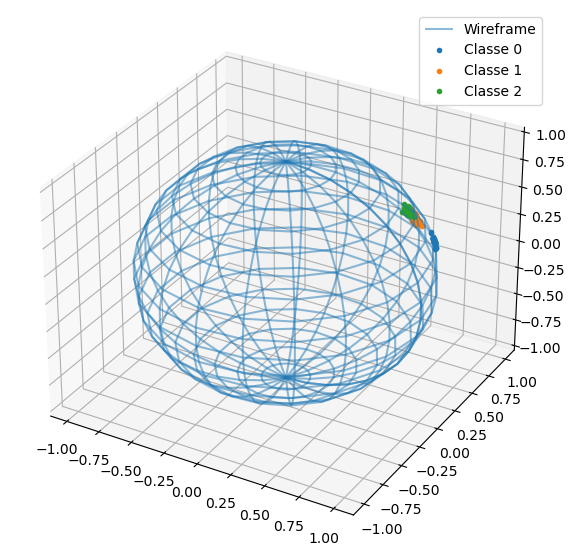

In [8]:
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
gx = np.cos(u)*np.sin(v)
gy = np.sin(u)*np.sin(v)
gz = np.cos(v)
f1 = plt.figure(figsize=(7,7))
ax = f1.add_subplot(111, projection='3d')
ax.plot_wireframe(gx, gy, gz, alpha=.5,)




X2 = X[:3, :]

# Se descomentar estas linhas, ou seja, fizer o StardardScaler antes do Normalize, 
# os dados ficam distribuídos uniformemente na esfera.   
# sc = pp.StandardScaler().fit(X2.T)
# X2 = sc.transform(X2.T).T

# Se descomentar estas linhas, ou seja, fizer o MinMaxScaler antes do Normalize, 
# os dados ficam distribuídos num quarto do circulo e não apenas numa parte do circulo.  
# mm = pp.MinMaxScaler().fit(X2.T)
# X2 = mm.transform(X2.T).T

# Sem a normalização dos dados, os mesmos estão numa zona muito restrita da esfera. 
# Se fizer os pré-processamento com os mecanismos acima as coisas já são diferentes.
# O normalizer funciona melhor se aplicarmos melhor o StandardScaler ou o RobustScaler
# porque a projeção de dados com média diferente de zero é melhor dispersa do que 
# dados com centrados com média zero. 
# Se uma das classes já tiver média zero, este método não funciona porque iria distribuir
# esses dados ao longo do(a) circulo/esfera, havendo sobreposição de classes
# e não sendo possível a distinção das classes. 
nn = pp.Normalizer().fit(X2.T)
Xn = nn.transform(X2.T).T

ax.plot(Xn[0,y==0], Xn[1, y==0], Xn[2, y==0], '.')
ax.plot(Xn[0,y==1], Xn[1, y==1], Xn[2, y==1], '.')
ax.plot(Xn[0,y==2], Xn[1, y==2], Xn[2, y==2], '.')
ax.legend(['Wireframe','Classe 0', 'Classe 1', 'Classe 2'])


#### Com digitos manuscritos

dict_keys(['foldTrain', 'trueClass', 'foldTest', 'X'])
(784, 15000)
uint8
float64
(784, 1500)


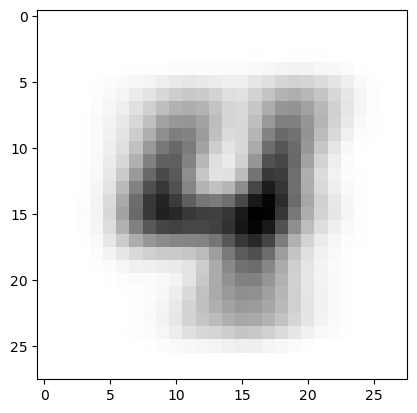

In [9]:
fN ='/Users/anaso/Documents/AA/AA-22-23/Laboratorios/Lab3/Material fornecido/MNISTsmall.p'
D = pickle.load(open(fN, 'rb'))

print(D.keys())

X = D['X']
y = D['trueClass']

foldTreino = D['foldTrain']
foldTeste = D['foldTest']

print(X.shape)

# Importante: Como os dados estão em uint8, somas e subtrações 
# vão dar a volta ao range de valores em que os dados estão
# compreendidos. Para isto não acontecer e retirarmos distaâncias
# corretas, é necessário passar os dados para float64, por exemplo. 
print(X.dtype)
X = X*1.
print(X.dtype)

X4 = X[:, y==4]
print(X4.shape)

# Visualizar o 13º valor do número 4
# a=np.reshape(X4[:, 13], (28,28))

# Visualizar a média do número 4
a=np.reshape(np.mean(X4, axis=1), (28,28))
#plt.imshow(255-a, cmap='gray', interpolation=None)
plt.imshow(a, cmap='binary', interpolation=None) # Assim não preciso de inverter as cores da imagem

#### Matrizes de Correlação
Matrizes compostas pelos coeficientes de correlação:
    - Covariância normalizada / desvios padrões de cada dimensão
    - Coeficientes compreendidos entre [-1, 1]
    - Quando temos valores muito elevados, também as matrizes de covariância vão ter valores muito elevados, por isso é mais intuitivo olhar para a matriz de coeficientes de correlação. 


Matriz covariância dos dados originais:
 [[ 1.00693675 -0.00859173]
 [-0.00859173  1.00202152]]
Matriz covariância dos dados transformados:
 [[ 0.80353467 -0.6534095 ]
 [-0.6534095   4.91630964]]
Matriz covariância dos dados escalados (3x):
 [[ 7.23181203 -5.88068554]
 [-5.88068554 44.24678679]]

NOTA: Matriz de covariância dos dados x2 e x3 tem grandes diferenças, ou seja, a escala dos dados afeta os valores da matriz de convariância. 

Matriz de coeficientes de correlação dos dados transformados:
 [[ 1.         -0.32874831]
 [-0.32874831  1.        ]]
Matriz de coeficientes de correlação dos dados escalados (3x):
 [[ 1.         -0.32874831]
 [-0.32874831  1.        ]]

NOTA: A matriz de coeficientes de correlação de x2 e x3 são iguais, embora os dados de x3 estejam estalados. 


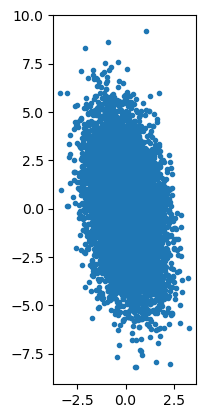

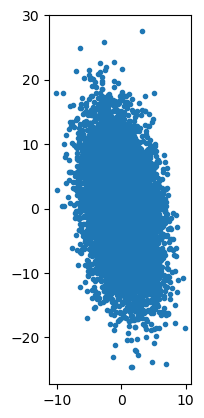

In [10]:
np.random.seed(42)
x = np.random.randn(2, 10000)
A = np.random.randn(2,2)*2
print("Matriz covariância dos dados originais:\n", np.cov(x)) # Matriz perto da matriz de identidade

x2 = np.dot(A, x)

plt.figure()
plt.plot(x2[0, :], x2[1, :], '.')
plt.axis('scaled')

x3 = x2*3

plt.figure()
plt.plot(x3[0, :], x3[1, :], '.')
plt.axis('scaled')


print("Matriz covariância dos dados transformados:\n", np.cov(x2)) # Matriz perto da matriz de identidade
print("Matriz covariância dos dados escalados (3x):\n", np.cov(x3)) # Matriz perto da matriz de identidade
print("\nNOTA: Matriz de covariância dos dados x2 e x3 tem grandes diferenças, ou seja, a escala dos dados afeta os valores da matriz de convariância. ")

print("\nMatriz de coeficientes de correlação dos dados transformados:\n", np.corrcoef(x2)) # Matriz perto da matriz de identidade
print("Matriz de coeficientes de correlação dos dados escalados (3x):\n", np.corrcoef(x3)) # Matriz perto da matriz de identidade
print("\nNOTA: A matriz de coeficientes de correlação de x2 e x3 são iguais, embora os dados de x3 estejam estalados. ")


float64


c:\Users\anaso\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\anaso\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]



 NOTA: Zonas a branco na matriz de coefientes de correlação são zonas onde a variância é zero. Posso ver essa veriância com np.diag. 


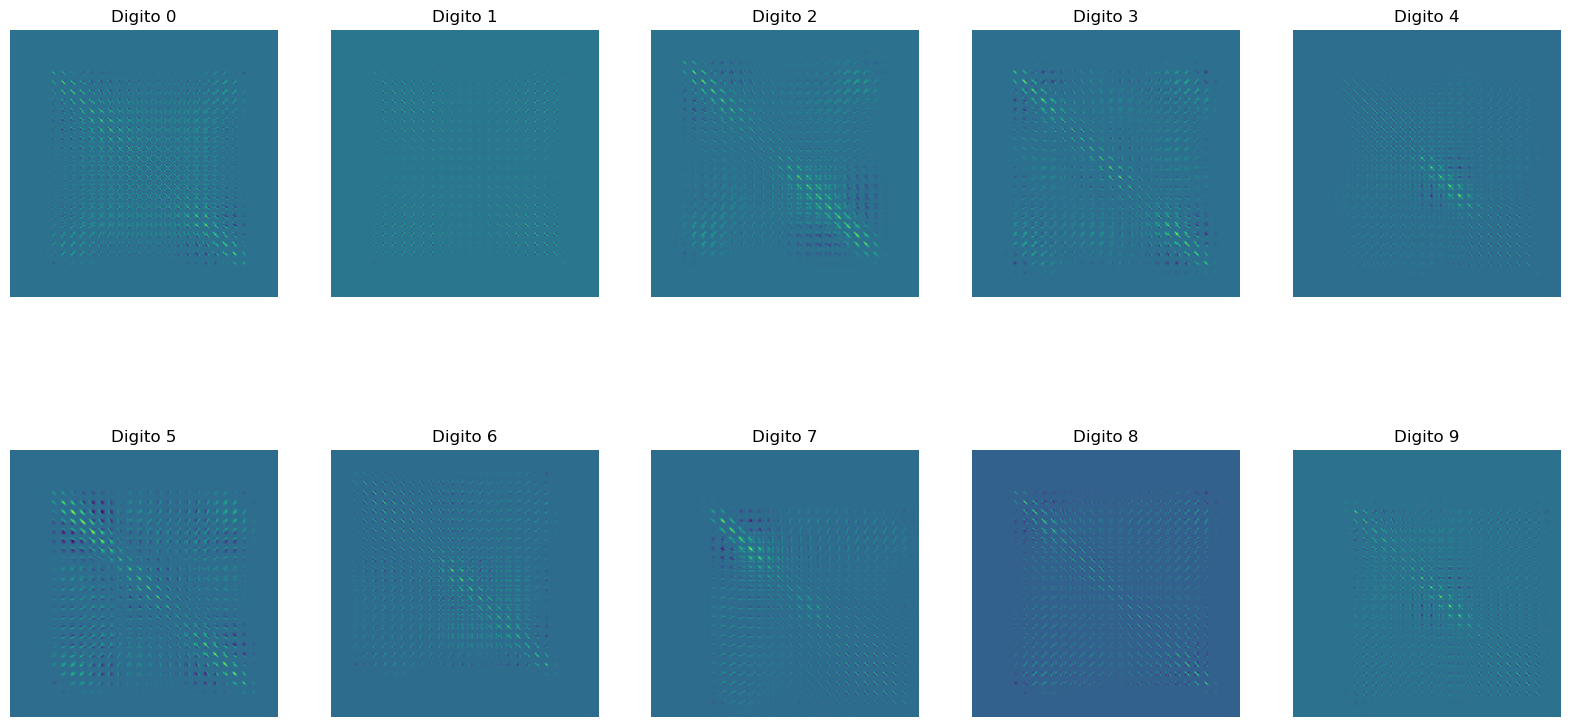

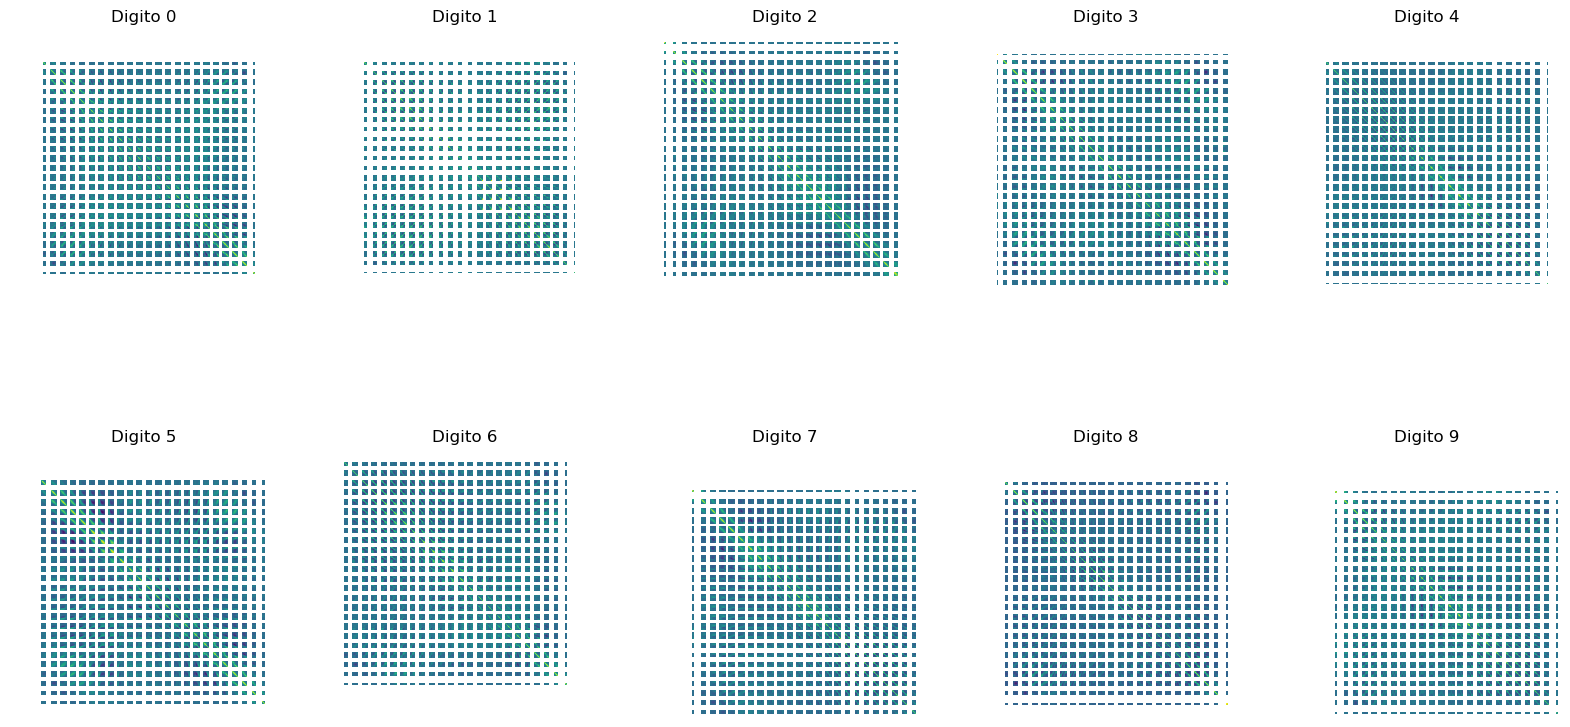

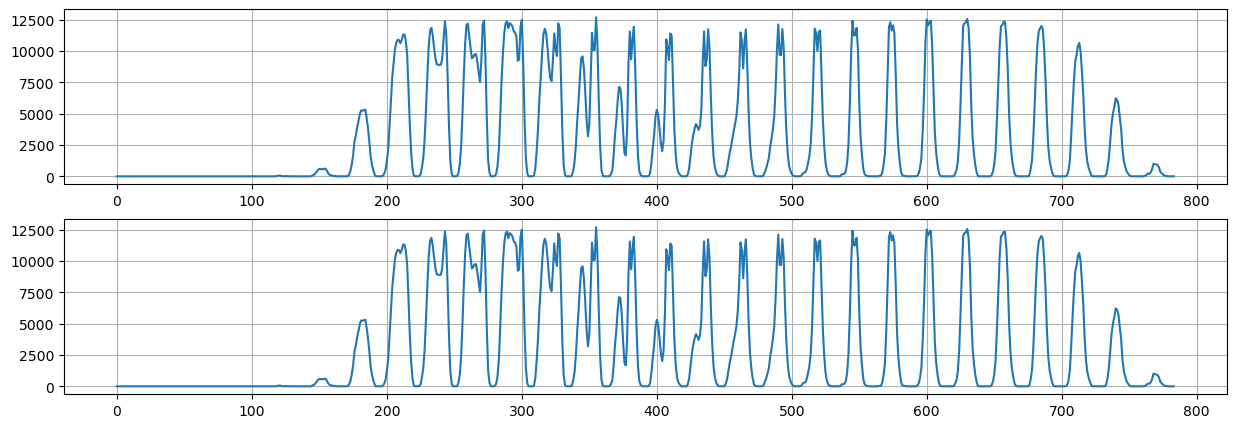

In [11]:
X = X*1.
print(X.dtype)

# Matriz de covariância de todos os dados da Classe 0
C0 = np.cov(X[:, y==0])
# Matriz de covariância de todos os dados da Classe 1
C1 = np.cov(X[:, y==1])
# Matriz de covariância de todos os dados da Classe 2
C2 = np.cov(X[:, y==2])
# Matriz de covariância de todos os dados da Classe 3
C3 = np.cov(X[:, y==3])
# Matriz de covariância de todos os dados da Classe 4
C4 = np.cov(X[:, y==4])
# Matriz de covariância de todos os dados da Classe 5
C5 = np.cov(X[:, y==5])
# Matriz de covariância de todos os dados da Classe 6
C6 = np.cov(X[:, y==6])
# Matriz de covariância de todos os dados da Classe 7
C7 = np.cov(X[:, y==7])
# Matriz de covariância de todos os dados da Classe 8
C8 = np.cov(X[:, y==8])
# Matriz de covariância de todos os dados da Classe 9
C9 = np.cov(X[:, y==9])
#print(C0.shape, C1.shape, C2.shape, C3.shape)

# Visualização das matrizes de covariancia
plt.figure(figsize=(20, 10))
plt.subplot(251)
plt.title("Digito 0")
plt.imshow(C0)
plt.axis('off')
plt.subplot(252)
plt.title("Digito 1")
plt.imshow(C1)
plt.axis('off')
plt.subplot(253)
plt.title("Digito 2")
plt.imshow(C2)
plt.axis('off')
plt.subplot(254)
plt.title("Digito 3")
plt.imshow(C3)
plt.axis('off')
plt.subplot(255)
plt.title("Digito 4")
plt.imshow(C4)
plt.axis('off')
plt.subplot(256)
plt.title("Digito 5")
plt.imshow(C5)
plt.axis('off')
plt.subplot(257)
plt.title("Digito 6")
plt.imshow(C6)
plt.axis('off')
plt.subplot(258)
plt.title("Digito 7")
plt.imshow(C7)
plt.axis('off')
plt.subplot(259)
plt.title("Digito 8")
plt.imshow(C8)
plt.axis('off')
plt.subplot(2,5,10)
plt.title("Digito 9")
plt.imshow(C9)
plt.axis('off')


# Matriz de coeficientes de correlação de todos os dados da Classe 0
S0 = np.corrcoef(X[:, y==0])
# Matriz de coeficientes de correlação de todos os dados da Classe 1
S1 = np.corrcoef(X[:, y==1])
# Matriz de coeficientes de correlação de todos os dados da Classe 2
S2 = np.corrcoef(X[:, y==2])
# Matriz de coeficientes de correlação de todos os dados da Classe 3
S3 = np.corrcoef(X[:, y==3])
# Matriz de coeficientes de correlação de todos os dados da Classe 4
S4 = np.corrcoef(X[:, y==4])
# Matriz de coeficientes de correlação de todos os dados da Classe 5
S5 = np.corrcoef(X[:, y==5])
# Matriz de coeficientes de correlação de todos os dados da Classe 6
S6 = np.corrcoef(X[:, y==6])
# Matriz de coeficientes de correlação de todos os dados da Classe 7
S7 = np.corrcoef(X[:, y==7])
# Matriz de coeficientes de correlação de todos os dados da Classe 8
S8 = np.corrcoef(X[:, y==8])
# Matriz de coeficientes de correlação de todos os dados da Classe 9
S9 = np.corrcoef(X[:, y==9])

# Visualização das matrizes de coefientes de correlação
plt.figure(figsize=(20, 10))
plt.subplot(251)
plt.title("Digito 0")
plt.imshow(S0)
plt.axis('off')
plt.subplot(252)
plt.title("Digito 1")
plt.imshow(S1)
plt.axis('off')
plt.subplot(253)
plt.title("Digito 2")
plt.imshow(S2)
plt.axis('off')
plt.subplot(254)
plt.title("Digito 3")
plt.imshow(S3)
plt.axis('off')
plt.subplot(255)
plt.title("Digito 4")
plt.imshow(S4)
plt.axis('off')
plt.subplot(256)
plt.title("Digito 5")
plt.imshow(S5)
plt.axis('off')
plt.subplot(257)
plt.title("Digito 6")
plt.imshow(S6)
plt.axis('off')
plt.subplot(258)
plt.title("Digito 7")
plt.imshow(S7)
plt.axis('off')
plt.subplot(259)
plt.title("Digito 8")
plt.imshow(S8)
plt.axis('off')
plt.subplot(2,5,10)
plt.title("Digito 9")
plt.imshow(S9)
plt.axis('off')

print("\n NOTA: Zonas a branco na matriz de coefientes de correlação são zonas onde a variância é zero. Posso ver essa veriância com np.diag. ")

# Para o caso do digito 6
v1 = np.diag(C7)
v2 = np.var(X[:, y==7], axis=1) # Alternativa para calcular a variância
plt.figure(figsize=(15,5))
plt.subplot(211)
plt.plot(v1)
plt.grid(True)
plt.subplot(212)
plt.plot(v2)
plt.grid(True)

(-0.5, 27.5, 27.5, -0.5)

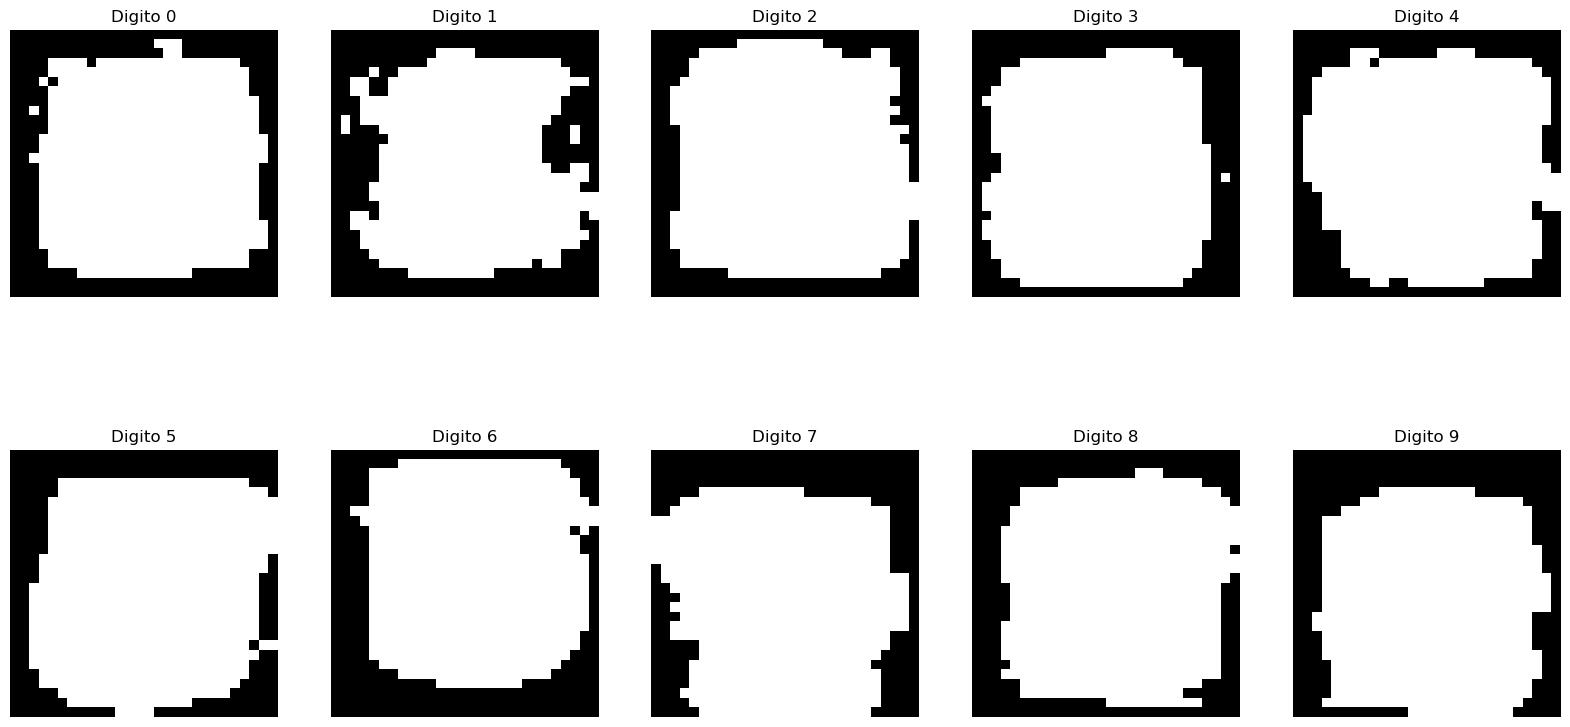

In [12]:
# Identificar pixeis com variância igual a 
#z7 = (v==0)*1
#plt.imshow(z7.reshape((28,28)), cmap='gray') # A branco ficam os pixeis do digito 7 que não variam

# Para todas as Classes
z0 = (np.diag(C0) != 0).reshape((28,28))
z1 = (np.diag(C1) != 0).reshape((28,28))
z2 = (np.diag(C2) != 0).reshape((28,28))
z3 = (np.diag(C3) != 0).reshape((28,28))
z4 = (np.diag(C4) != 0).reshape((28,28))
z5 = (np.diag(C5) != 0).reshape((28,28))
z6 = (np.diag(C6) != 0).reshape((28,28))
z7 = (np.diag(C7) != 0).reshape((28,28))
z8 = (np.diag(C8) != 0).reshape((28,28))
z9 = (np.diag(C9) != 0).reshape((28,28))


# Visualização das variâncias != 0 de cada Classe
plt.figure(figsize=(20, 10))
plt.subplot(251)
plt.title("Digito 0")
plt.imshow(z0, cmap='gray')
plt.axis('off')
plt.subplot(252)
plt.title("Digito 1")
plt.imshow(z1, cmap='gray')
plt.axis('off')
plt.subplot(253)
plt.title("Digito 2")
plt.imshow(z2, cmap='gray')
plt.axis('off')
plt.subplot(254)
plt.title("Digito 3")
plt.imshow(z3, cmap='gray')
plt.axis('off')
plt.subplot(255)
plt.title("Digito 4")
plt.imshow(z4, cmap='gray')
plt.axis('off')
plt.subplot(256)
plt.title("Digito 5")
plt.imshow(z5, cmap='gray')
plt.axis('off')
plt.subplot(257)
plt.title("Digito 6")
plt.imshow(z6, cmap='gray')
plt.axis('off')
plt.subplot(258)
plt.title("Digito 7")
plt.imshow(z7, cmap='gray')
plt.axis('off')
plt.subplot(259)
plt.title("Digito 8")
plt.imshow(z8, cmap='gray')
plt.axis('off')
plt.subplot(2,5,10)
plt.title("Digito 9")
plt.imshow(z9, cmap='gray')
plt.axis('off')



Verificamos que há dimensões que têm variância a zero em qualquer Classe. Assim, podemos eliminar a informação dessas dimensões. Para isso podemos usar duas estratégias, no entanto nenhum tem resultados ótimos:
- OR: não deitamos fora nenuma dimensão com $ \sigma_i^2 \neq 0.$ Devem existir dimensões que variam muito pouco e são desnecessárias. 
- AND: reduzimos a dimensão dos dados e só usamos as que variam em todas as imagens. Deve haver dimensões com informação que são descartadas. 

O ideal, neste caso, é usar PCA. 

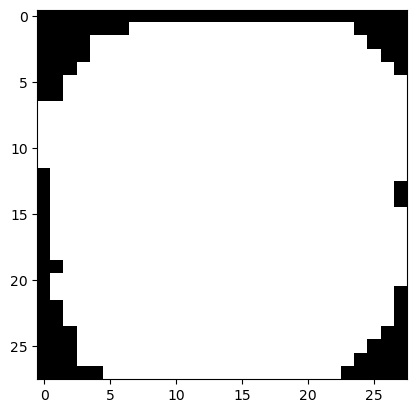

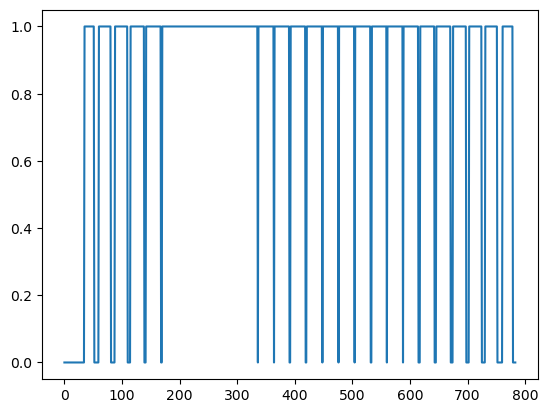

In [13]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler().fit(X.T)
X2 = sc.transform(X.T).T

v = np.var(X2, axis=1)
plt.imshow(v.reshape(28, 28), cmap='gray')

plt.figure()
plt.plot(v)

#### PCA no conjunto MNIST



(784,)
(784, 784)


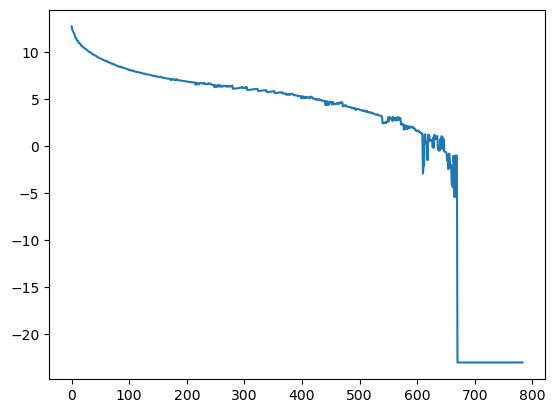

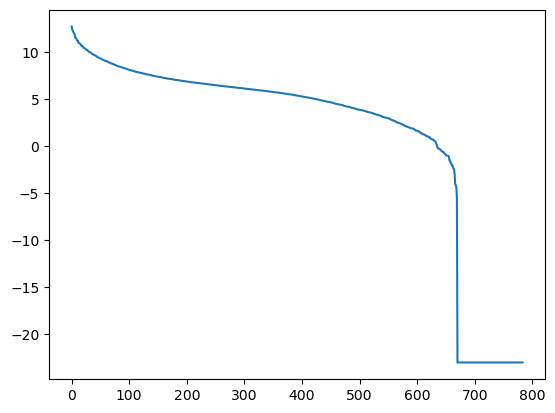

In [14]:
Cx = np.cov(X) # Calcular a covariancia dos dados
u, W = la.eig(Cx) # Obter vetores e valores próprios
print (u.shape)
print(W.shape)

# 50 primeiros valores dos valores próprios. Resultados em números complexos, porém a parte imaginária é muito próxima de zero, por isso podemos discarta-la
#u[:50] 
u = u.real # Obter apenas a parte real dos valores próprios

# Como os valores próprios não estão ordenados, precisamos de ordenar tanto os valores próprios como os vetores próprios
plt.plot(np.log(u + 1e-10)) # Podemos ver que os valores não estão ordenados através dos altos e baixos no gráfico do logaritmo dos valores próprios

idx = np.argsort(-u) # -u para ordenar de forma descendente
u = u[idx]
W = W[:, idx]

plt.figure()
plt.plot(np.log(u + 1e-10)) # se somar + 1e-10 já consigo ver todos os valores no gráfico e sem erros

In [15]:
np.sum(u < 1e-10) # Quantos valores próprios são inferiores a 10^-10? Estas são as dimensões que, à priori, podemos discartar

un = u/np.sum(u) # normalização de u
L = np.cumsum(un) # soma comulativa do u normalizado 

print("Quantos valores próprios preciso para ter 90% dos dados? ", np.sum(L<=0.9)) # Verifico quandos valores de L são precisos para que tenha 90% da variância dos dados
print("Quantos valores próprios preciso para ter 95% dos dados? ",np.sum(L<=0.95)) # Verifico quandos valores de L são precisos para que tenha 95% da variância dos dados
print("Quantos valores próprios preciso para ter 99% dos dados? ",np.sum(L<=0.99)) # Verifico quandos valores de L são precisos para que tenha 95% da variância dos dados


Quantos valores próprios preciso para ter 90% dos dados?  86
Quantos valores próprios preciso para ter 95% dos dados?  151
Quantos valores próprios preciso para ter 99% dos dados?  326


(50, 15000)
(784, 15000)


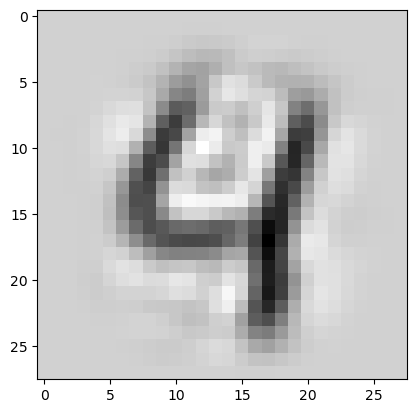

In [16]:
m = np.mean(X, axis=1)[:, np.newaxis]
Xn = X-m # Tiro a média aos dados todos

W2 = W[:, :50] # Escolho apenas as primeiras 50 componentes principais
Xp = np.dot(W2.T, Xn) # Dados projetados
Xr = np.dot(W2, Xp) + m # Recuperados dados a partir de dados com as primeiras 50 componentes principais

# Xp tem 50 dimensões x número de amostras dos dados originais
print(Xp.shape)
# Xr tem tantas dimensões como os dados originais x número de amostras dos dados originais
print(Xr.shape)


# Visualizar um dos digitos reconstruídos
x = Xr[:, 7000] # Obtenho um dos digitos
# Escalo os dados para que fiquem entre [0, 255]
x = x-x.min()
x = x/x.max()*255

# Também posso cortar dados de forma a que os dados abaixo de 0 fiquem a 0, e os dados acima de 255 fiquem a 255. 
# No entanto, estou a perder informação dos dados 
x = np.clip(x, 0, 255)

plt.imshow(x.reshape(28, 28).astype('uint8'), cmap='binary') # Mostrar o digito que obtive acima


664

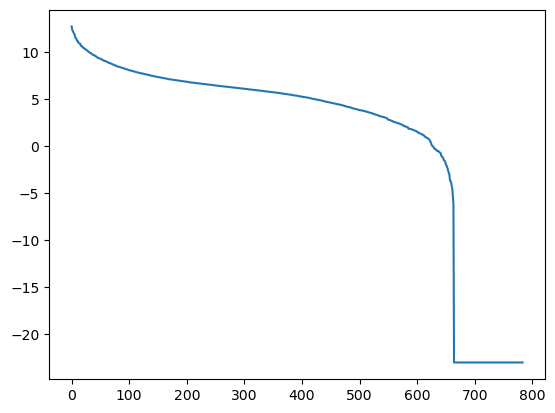

In [23]:
D.keys()

f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:, f1]
y1 = y[f1]
X2 = X[:, f2]
y2 = y[f2]



import scipy.linalg as la
# Calcular matriz de covariancia dos dados de treino
Cx = np.cov(X1)
# Obter valores próprios e vetores próprios da matriz de covariancia dos dados de treino
u, V = la.eig(Cx)
u = u.real
V = V.real

# Ordenar valores e vetores próprios em ordem decrescente
idx = np.argsort(-u)
u = u[idx]
V = V[:, idx]

# Mostrar curva logaritmica dos valores próprios
plt.plot(np.log(u+1e-10))

# Ver quantos valores prórpios estão próximos de zero
np.sum(u>=1e-6)

In [32]:
W = V[:, :664]

# Tirar a média dos dados
m = np.mean(X1, axis=1)[:, np.newaxis]

# Tirar a média aos dados de treino
X1n = X1-m

# Projetar os dados nas componentes principais
X1p = np.dot(W.T, X1n)

# Calculo o desvio padrão dos dados
s = np.std(X1p, axis=1)
print(s[:10])

# Normalizo os dados com o desvio padrão obtido acima
Xtmp = (X1p.T/s).T
# Calculo o desvio padrão dos dados normalizados (Tem que dar tudo a 1)
#np.std(Xtmp, axis=1)


# Em alternativa também posso criar matriz com diagonal 1/s e multiplicar pelos dados
S = np.diag(1/s)
X1p = np.dot(S, X1p)
#np.std(X1p, axis=1)


# Aplico a mesma transformação aos dados de teste
X2n = X2-m
X2p = np.dot(W.T, X2n)
X2p = np.dot(S, X2p)


[586.00518804 493.42306958 461.38830872 434.07789728 405.52569402
 387.78533176 335.16926737 317.54195021 310.15556184 282.8773864 ]


In [55]:
# Agora posso aplicar ao Classificador (Ex: K-Vizinhos mais próximos)


# 1ª CLASSIFICAR SEM ANÁLISE EM COMPONENTES PRINCIPAIS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#from .Material_fornecido.plotMatriz import plotMatriz

knn = KNeighborsClassifier(n_neighbors=1).fit(X1.T, y1)
y2e = knn.predict(X2.T)
CM = confusion_matrix(y2, y2e)
print(np.sum(y2 != y2e)/y2.shape[0]*100) # Para obter percentagem
print(CM)


7.140000000000001
[[496   0   1   0   0   1   2   0   0   0]
 [  0 495   1   2   0   0   2   0   0   0]
 [  7  11 452   7   1   0   3  18   1   0]
 [  0   1   1 461   1  13   2   9   7   5]
 [  0   5   0   0 460   0   3   2   1  29]
 [  3   3   0  13   2 466   3   2   3   5]
 [  8   3   0   0   3   4 481   0   1   0]
 [  0  22   3   2   4   1   0 456   0  12]
 [  5   3   6  27   4  16   6   7 421   5]
 [  3   6   1   6  12   3   1  11   2 455]]


In [58]:
# 1ª CLASSIFICAR COM ANÁLISE EM COMPONENTES PRINCIPAIS

# Vou buscar as primeiras 100 componentes principais 
N = 40
W = V[:, :N]

# Tiro a média dos dados
m = np.mean(X1, axis=1)[:, np.newaxis]

# Transformo os dados de treino e de teste
X1n = X1-m
X1p = np.dot(W.T, X1n)

X2n = X2-m
X2p = np.dot(W.T, X2n)


knn = KNeighborsClassifier(n_neighbors=1).fit(X1p.T, y1)
y2e = knn.predict(X2p.T)
CM = confusion_matrix(y2, y2e)
CM = confusion_matrix(y2, y2e)
print(np.sum(y2 != y2e)/y2.shape[0]*100) # Para obter percentagem
print(CM)

5.86
[[496   0   1   0   0   0   3   0   0   0]
 [  0 494   1   2   0   0   2   0   0   1]
 [  4   3 465   9   1   0   3  12   3   0]
 [  0   1   2 459   1  14   2   8  10   3]
 [  0   1   0   0 465   0   5   0   1  28]
 [  4   2   0   9   1 470   5   2   3   4]
 [  7   3   0   0   1   1 487   0   1   0]
 [  0  17   8   2   4   0   0 459   0  10]
 [  2   0   3  18   2  10   7   4 450   4]
 [  3   6   1   5  12   3   1   3   4 462]]


In [70]:
# Analise em componentes principais com Sklearn

from sklearn.decomposition import PCA

# Para 100 componentes principais
pca = PCA(n_components=100).fit(X1.T) # pca = PCA(n_components=100, whiten=True).fit(X1.T) - Whiten = True -> coloca a variância a um 
X1p = pca.transform(X1.T).T
X2p = pca.transform(X2.T).T

knn = KNeighborsClassifier(n_neighbors=1).fit(X1p.T, y1)
y2e = knn.predict(X2p.T)
CM = confusion_matrix(y2, y2e)
CM = confusion_matrix(y2, y2e)
print("Classificação com 100 componentes principais")
print(np.sum(y2 != y2e)/y2.shape[0]*100) # Para obter percentagem
print(CM)


# Para 40 componentes principais
pca = PCA(n_components=40).fit(X1.T) # pca = PCA(n_components=100, whiten=True).fit(X1.T) - Whiten = True -> coloca a variância a um 
X1p = pca.transform(X1.T).T
X2p = pca.transform(X2.T).T

knn = KNeighborsClassifier(n_neighbors=1).fit(X1p.T, y1)
y2e = knn.predict(X2p.T)
CM = confusion_matrix(y2, y2e)
CM = confusion_matrix(y2, y2e)
print("Classificação com 40 componentes principais")
print(np.sum(y2 != y2e)/y2.shape[0]*100) # Para obter percentagem
print(CM)

Classificação com 100 componentes principais
6.7
[[495   0   1   0   0   1   3   0   0   0]
 [  0 496   1   2   0   0   1   0   0   0]
 [  6   6 458   7   1   0   2  17   3   0]
 [  0   2   2 460   1  12   2  10   8   3]
 [  0   4   1   0 460   0   3   1   1  30]
 [  3   2   1  12   3 463   4   3   6   3]
 [  5   3   0   0   1   3 487   0   1   0]
 [  0  22   3   1   4   1   0 461   0   8]
 [  4   1   6  27   4  13   8   3 430   4]
 [  3   6   1   5  11   3   1  11   4 455]]
Classificação com 40 componentes principais
5.86
[[496   0   1   0   0   0   3   0   0   0]
 [  0 494   1   2   0   0   2   0   0   1]
 [  4   3 465   9   1   0   3  12   3   0]
 [  0   1   2 459   1  14   2   9   9   3]
 [  0   1   0   0 466   0   5   0   1  27]
 [  4   2   0   9   1 470   5   2   3   4]
 [  7   3   0   0   1   1 487   0   1   0]
 [  0  17   8   2   4   0   0 459   0  10]
 [  2   0   3  18   2  10   7   4 450   4]
 [  3   6   2   5  12   3   1   3   4 461]]


#### LDA - Análise em Discriminantes Lineares 

Objectivo: 
- Projetar os dados de modo a que a variância entre classes seja a maior possível e a variância inter classe seja a menos possível
- Vetor de projeção depende da matriz de covariância de cada classe e da média de cada classe. Soma-se as matrizes de convariância. Inverte-se a soma das matrizes e multiplica-se pela diferença das médias. 

In [81]:
fN = '/Users/anaso/Documents/AA/AA-22-23/Laboratorios/Lab3/Material fornecido/MNISTsmall.p'

D = pickle.load(open(fN, 'rb'))
D.keys()

X = D['X']*1.
y = D['trueClass']

f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:, f1]
y1 = y[f1]

X2 = X[:, f2]
y2 = y[f2]


# Dados de treino com classes 0 e 1
Xa = X1[:, y1==0]
Xb = X1[:, y1==1]
X01_treino = np.hstack((Xa, Xb))
y1 = np.hstack((np.zeros(1000), np.ones(1000)))

# Dados de teste com classes 0 e 1
Xa = X2[:, y2==0]
Xb = X2[:, y2==1]
X01_teste = np.hstack((Xa, Xb))
y2 = np.hstack((np.zeros(500), np.ones(500)))

print(X01_treino.shape, X01_teste.shape)


(784, 2000) (784, 1000)


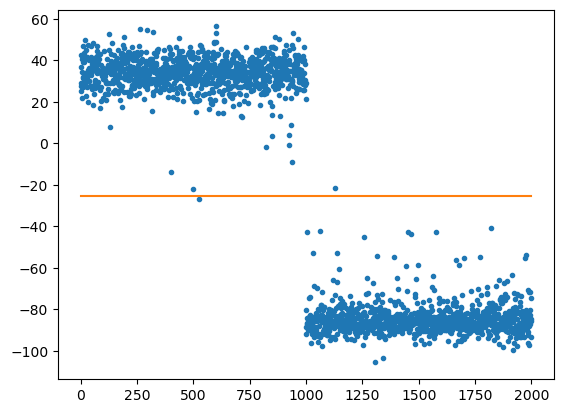

In [82]:
m0 = np.mean(X01_treino[:, y1==0], axis=1)
m1 = np.mean(X01_treino[:, y1==1], axis=1)

cov0 = np.cov(X01_treino[:, y1==0])
cov1 = np.cov(X01_treino[:, y1==1])

w = np.dot(la.pinv(cov0 + cov1), m0-m1)

X01_treino_projetado = np.dot(w.T, X01_treino)
l = (np.dot(w, m0) + np.dot(w, m1))/2

plt.plot(X01_treino_projetado, '.')
plt.plot([0, 2000], [l, l])


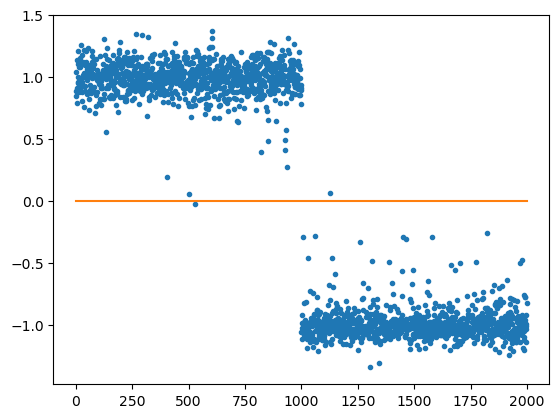

In [85]:
pca = PCA(n_components=1-1e-15, whiten=True).fit(X01_treino.T)
X01_treino_pca = pca.transform(X01_treino.T).T

m0 = np.mean(X01_treino_pca[:, y1==0], axis=1)
m1 = np.mean(X01_treino_pca[:, y1==1], axis=1)

cov0 = np.cov(X01_treino_pca[:, y1==0])
cov1 = np.cov(X01_treino_pca[:, y1==1])

w = np.dot(la.pinv(cov0 + cov1), m0-m1)
w = w/np.sqrt(np.sum(w**2))

X01_treino_projetado = np.dot(w.T, X01_treino_pca)
l = (np.dot(w, m0) + np.dot(w, m1))/2

plt.plot(X01_treino_projetado, '.')
plt.plot([0, 2000], [l, l])



[ 527 1127]


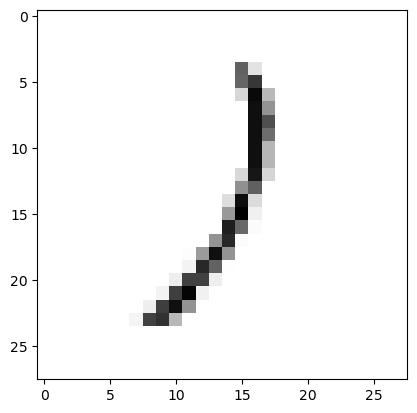

In [91]:
# Visualizar pontos mal classificados no conjunto de treino
y1e = (X01_treino_projetado<0)*1
idx = np.argwhere(y1!=y1e).squeeze()
print(idx)

plt.figure()
z = X01_treino[:, 527].reshape((28, 28))
plt.imshow(z, cmap='binary')

plt.figure()
z = X01_treino[:, 1127].reshape((28, 28))
plt.imshow(z, cmap='binary')

[ 24  63  89 134 196 205 232 306 312 343 346 348 353 402 449 478 610 617
 705 719 848 941 985]


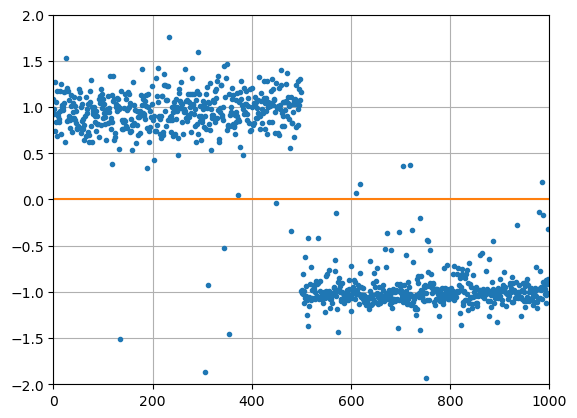

In [94]:
# Aplicar no conjunto de teste
X01tp = pca.transform(X01_teste.T).T
X01_teste_projetado = np.dot(w.T, X01tp)
l = (np.dot(w, m0) + np.dot(w, m1))/2

plt.plot(X01_teste_projetado, '.')
plt.plot([0, 1000], [l, l])
plt.grid(True)
plt.axis([0, 1000, -2, 2])

y2e = (X01_teste_projetado<0)*1
idx = np.argwhere(y2!=y2e).squeeze()
print(idx)